# Multiple Logistic Regression in Python  - College Admission

### Overview
Predict college admission using Multiple Logistic Regression
 
### Builds on
None

### Run time
approx. 10-20 minutes

### Notes



In [24]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd



## Step 1: College Admission Data

Let's look at the college admission data.  Here, we have some student test scores, GPA, and Rank, followed by whether the student was admitted or not.


|gre  |gpa  |rank |  admitted |
|-----------------------------|
|380  |3.61 | 3   |    no     |
|660  |3.67 | 1   |    yes    |
|800  |4.0  | 1   |    yes    |
|640  |3.19 | 4   |    yes    |
|520  |2.93 | 4   |    no     |
|760  |3.0  | 2   |    yes    |

In [25]:
location = "/data/college-admissions/admission-data.csv"
location = 'https://s3.amazonaws.com/elephantscale-public/data/college-admissions/admission-data.csv'
admissions = pd.read_csv(location)
admissions.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,0,640,3.19,4
4,0,520,2.93,4


## Step 3: Split Data into training and Test

We will split our data into training and test so we can see how it performs.

**=> TODO: Use training / test split of 70%/30% **

In [26]:
from sklearn.model_selection import train_test_split
 
feature_vector = admissions[['gpa', 'gre', 'rank']] # What is hte feature vector (gpa, gre, rank)
# or
# feature_vector = admissions.drop('admit', axis=1) 

labels = admissions['admit'] # What is the label (admit) 
    
train_x, test_x, train_y, test_y = train_test_split(feature_vector, 
                                                    labels, test_size=0.2)
print("training set = " , train_x.shape)
print("testing set = " , test_x.shape)

training set =  (80, 3)
testing set =  (20, 3)


In [27]:
feature_vector.head()

,gpa,gre,rank
0,3.61,380,3
1,3.67,660,3
2,4.00,800,1
3,3.19,640,4
4,2.93,520,4


In [28]:
labels.head()

0    0
1    1
2    1
3    0
4    0
Name: admit, dtype: int64


## Step 4: Run logistic regression



In [29]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

# Fit the model
lrModel = lr.fit(train_x, train_y)


lrModel

/Users/sujee/anaconda3/envs/dev1/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

## Step 5: Inspect Learning


## Step 6: Evaluate Model

### 6.1 Confusion Matrix

In [30]:
from sklearn.metrics import confusion_matrix

predictions = lrModel.predict(test_x)
confusion_matrix(test_y, predictions)

array([[6, 6],
       [1, 7]])

### 6.2 :  ROC Curve & AUC

In [31]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(test_y, predictions)
roc_auc = auc(fpr, tpr)



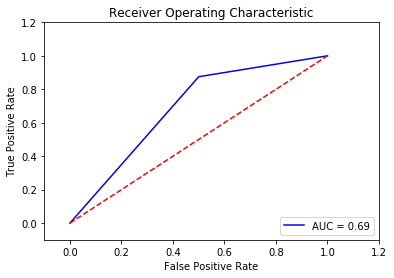

In [32]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Step 7: Run on the test data

**=>TODO: transform the test data **

In [33]:
## what is the name of test dataframe?
predictions = lrModel.predict(test_x)
print(test_x)
print(predictions)


     gpa  gre  rank
68  3.69  580     1
9   3.92  700     2
42  3.15  600     2
89  4.00  660     2
40  2.42  560     2
56  3.19  560     3
57  2.94  380     3
39  2.68  520     3
67  3.30  620     1
93  2.93  580     2
44  2.94  700     2
94  3.44  660     2
11  3.22  440     1
82  2.71  500     2
80  2.90  700     4
72  3.39  480     4
31  3.35  760     3
28  3.22  780     2
30  3.78  540     4
88  3.28  700     1
[1 1 1 1 1 0 0 0 1 1 1 1 0 0 1 0 1 1 0 1]


## Step 8: Calcuate Accuracy on Test Data

**=>TODO: evaluate the predictions **

In [34]:
from sklearn.metrics import accuracy_score
accuracy_score(test_y, predictions)

0.65

## Step 9: Run some predictions on new data

Let's take some new data, and run predictions on that.

**=>TODO: transform the new data in order to get feature vectors **

In [35]:
newdata = pd.DataFrame({'gre' : [600, 700, 800], 
                        'gpa' : [4.0, 3.5, 3.2],
                        'rank': [1,   2,   3]}
             )
print(newdata)


   gre  gpa  rank
0  600  4.0     1
1  700  3.5     2
2  800  3.2     3


In [36]:
lrModel.predict(newdata)

array([0, 0, 0])